# Introducción

Con este proyecto mi objetivo es encontrar patrones en la información disponible además de comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Analizaré los datos de los competidores y probaré una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

### Primero voy a cargar las librerías y las tablas además de ver la información de las mismas.

In [1]:
# Cargar librerías.

from scipy import stats as st
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import math

In [2]:
# Carga los archivos de datos en diferentes DataFrames.

comp_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
doln_avg = pd.read_csv('/datasets/project_sql_result_04.csv')
trips = pd.read_csv('/datasets/project_sql_result_07.csv')

In [3]:
comp_trips.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [4]:
comp_trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [5]:
print(comp_trips[comp_trips.duplicated()])

Empty DataFrame
Columns: [company_name, trips_amount]
Index: []


In [6]:
comp_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
doln_avg.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [8]:
doln_avg.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [9]:
print(doln_avg[doln_avg.duplicated()])

Empty DataFrame
Columns: [dropoff_location_name, average_trips]
Index: []


In [10]:
doln_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Me puedo dar cuenta que en ninguno de estos datasets se encuentran valores duplicados por el filtro que imprimí, ni valores ausentes porque el 'info' no los muestra.

Me doy cuenta que el dataset comp_trips se compone por el nombre de la compañia y el número de viajes, mientras que el dataset doln_avg se compone por la dirección de dejada y el número promedio de viajes donde se deja al pasajero en ese lugar.

In [11]:
# Filtro para obtener los 10 primeros destinos de dejada.

doln_avg_10 = doln_avg[doln_avg['average_trips'] > 1259]
print (doln_avg_10)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [12]:
# Filtro para obtener las 10 primeras compañías en cuanto a número de viajes.

comp_trips_10 = comp_trips[comp_trips['trips_amount'] > 5952]
print (comp_trips_10)

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


### Ahora haré gráficas para observar la información con detalle.

<AxesSubplot:title={'center':'10 principales compañías por número de viajes'}, xlabel='Compañía', ylabel='Número de viajes'>

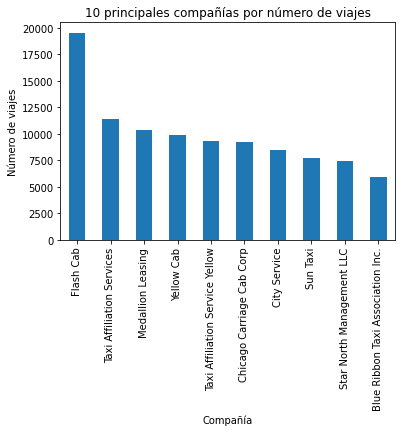

In [13]:
# Creación de gráfico de las 10 principales compañias con base en el número de viajes.

comp_trips_10.plot(kind= 'bar', x= 'company_name', title= '10 principales compañías por número de viajes', legend=False, xlabel= 'Compañía', ylabel= 'Número de viajes')


<AxesSubplot:title={'center':'10 principales barrios por promedio de viajes'}, xlabel='Barrio', ylabel='Media de viajes'>

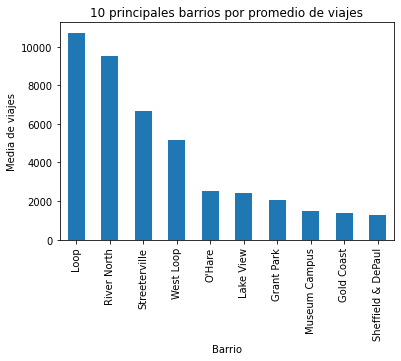

In [14]:
# Creación de gráfico de los 10 principales barrios con base en el promedio de viajes.


doln_avg_10.plot(kind= 'bar', x= 'dropoff_location_name', legend=False, title= '10 principales barrios por promedio de viajes', xlabel= 'Barrio', ylabel= 'Media de viajes')

Puedo encontrar a base de los gráficos que la dirección de dejada de pasajeros se concentra principalmente en los 4 primeros lugares según el promedio de viajes, sin embargo en las compañías la compañía que tiene una diferencia fuerte respecto al resto es solo la 1ra, por lo tanto, probablemente es esta la compañía que se dedique en su mayoría a hacer los viajes a los 4 destinos de dejada principales.

### Construiré las hipótesis correspondientes y probaré si se puede rechazar o no la hipótesis nula.

In [15]:
print(trips)

                 start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0
1067  2017-11-04 16:00:00                Bad            2834.0

[1068 rows x 3 columns]


In [16]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [17]:
trips.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [18]:
print(trips[trips.duplicated()])

                 start_ts weather_conditions  duration_seconds
62    2017-11-11 06:00:00               Good            1260.0
74    2017-11-11 08:00:00               Good            1380.0
76    2017-11-04 09:00:00               Good            1380.0
117   2017-11-11 07:00:00               Good            1380.0
119   2017-11-04 14:00:00               Good            3300.0
...                   ...                ...               ...
1054  2017-11-11 07:00:00               Good            1380.0
1058  2017-11-25 12:00:00               Good            1440.0
1062  2017-11-11 06:00:00               Good            1500.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0

[197 rows x 3 columns]


In [19]:
trips['start_ts'] = pd.to_datetime(trips['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [20]:
trips= trips.drop_duplicates()

Observo que se encuentran valores duplicados por el filtro que imprimí así que los eliminé, no hay valores ausentes porque el 'info' no los muestra.

Me doy cuenta que el dataset se compone por fecha del viaje, clima y duración del viaje.

In [21]:
trips_good = trips[trips['weather_conditions'] == 'Good']
trips_bad = trips[trips['weather_conditions'] == 'Bad']
trips_good = trips_good.dropna()
trips_bad = trips_bad.dropna()
trips_good_ds = trips_good['duration_seconds']
trips_bad_ds = trips_bad['duration_seconds']


alpha = 0.05 

results = st.levene(trips_good_ds, trips_bad_ds) 

print('valor p:',  results.pvalue) 

if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
    equal_var_test = False
else:
    print("No podemos rechazar la hipótesis nula")
    equal_var_test = True


valor p: 0.9806770360671218
No podemos rechazar la hipótesis nula


H0: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos.

H1: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

Planteo estas hipótesis porque la prueba que efectuaré busca conocer si hay diferencia de las duraciones para tomar estos datos en cuenta cuando se repitan estas condiciones.

Usaré el ttest_ind dado que se busca ver si hay un cambio en el promedio de los sábados con lluvia o sin lluvia.

In [23]:
alpha = 0.05 

results = st.ttest_ind(trips_good_ds, trips_bad_ds, equal_var = equal_var_test ) 

print('valor p:',  results.pvalue) 

if results.pvalue < alpha: 
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 7.397770692813604e-08
Rechazamos la hipótesis nula


-------------------------------------------------------
Después de la prueba me doy cuenta de que la hipótesis nula de afirmar la igualdad de duración entre días con buen y mal clima se puede rechazar.

### Conclusión general

Puedo observar que hay diferentes variables que se pueden tomar en cuenta a la hora de analizar viajes y así poder determinar las situaciones que puedan impulsar o detener las ventas de los viajes. En general me parece que si tomamos en cuenta la situación particular de un lugar en específico, como en este caso los destinos de los viajes y el clima, podemos tomar ventaja y así maximizar ganancias minimizando las posibles pérdidas.

En este proyecto se realizaron algunas tareas para el análisis de diferentes compañías de viajes junto con viajes y sus circunstancias.

1.- Realicé la carga de las librerías necesarias para el proyecto.

2.- Realicé la carga de los datos a analizar.

3.- Hice una revisión de los datos.

4.- Hice un preprocesamiento de los datos.

5.- Analicé los datos y procesé los necesarios.

6.- Cree gráficas para visualizar mejor la información.

7.- Formulé las hipótesis.

8.- Hice los tests necesarios para rechazar o no las hipótesis.

9.- Conclusión general.

10.- Efectúo un resumen de las tareas realizadas en dicho proyecto.
